In [12]:
!pip install seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("DS_Companies.csv")
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
df1 = df.groupby('work_year')['salary_in_usd'].mean().round(2)
df1

work_year
2020     95813.00
2021     99853.79
2022    124522.01
Name: salary_in_usd, dtype: float64

In [5]:
df1.index

Index([2020, 2021, 2022], dtype='int64', name='work_year')

In [6]:
df1.values

array([ 95813.  ,  99853.79, 124522.01])

In [7]:
data = {
    'work_year': df1.index,
    'average_salary': df1.values
}
df1 = pd.DataFrame(data)
df1

,work_year,average_salary
0,2020,95813.00
1,2021,99853.79
2,2022,124522.01


In [8]:
df1['average_salary'] = (df1['average_salary']/1000).round(2)
df1

,work_year,average_salary
0,2020,95.81
1,2021,99.85
2,2022,124.52


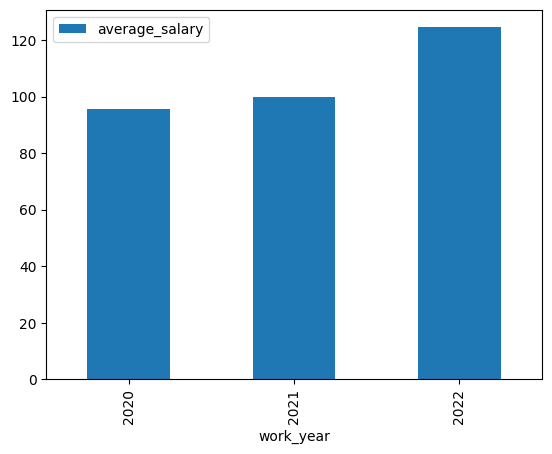

In [9]:
ax = df1.plot(kind = 'bar', x = 'work_year', y = 'average_salary', legend = True)

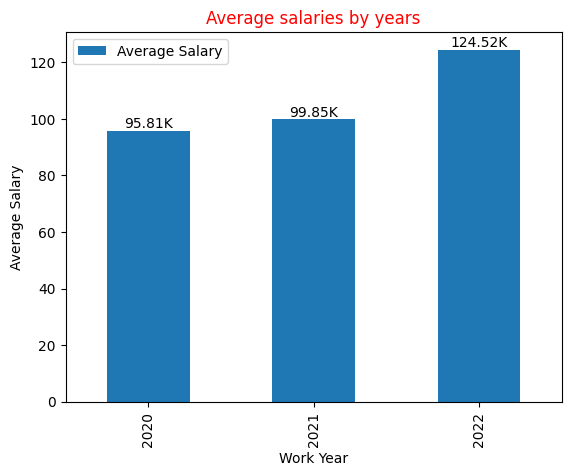

In [10]:
ax = df1.plot(kind = 'bar', x = 'work_year', y = 'average_salary', legend = True)
ax.bar_label(ax.containers[0], labels = df1['average_salary'].map('{:.2f}K'.format))
ax.legend(['Average Salary'], loc = 'upper left')
plt.xlabel('Work Year')
plt.ylabel('Average Salary')
plt.title('Average salaries by years', color = 'red')
plt.show()

In [11]:
print(ax.containers)
print(ax.containers[0])

[<BarContainer object of 3 artists>]
<BarContainer object of 3 artists>


In [12]:
for bar in ax.containers[0]:
    print(bar)

Rectangle(xy=(-0.25, 0), width=0.5, height=95.81, angle=0)
Rectangle(xy=(0.75, 0), width=0.5, height=99.85, angle=0)
Rectangle(xy=(1.75, 0), width=0.5, height=124.52, angle=0)


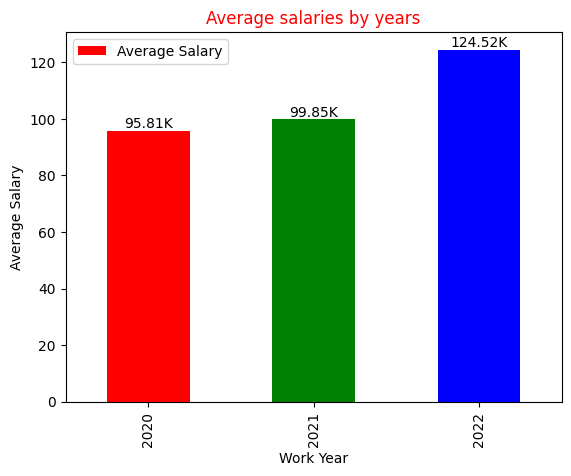

In [13]:
colors = ['red', 'green', 'blue', 'orange', 'purple']

ax = df1.plot(
    kind='bar',
    x='work_year',
    y='average_salary',
    color=colors[:len(df1)],
    legend=True
)

ax.bar_label(ax.containers[0], labels = df1['average_salary'].map('{:.2f}K'.format))
ax.legend(['Average Salary'], loc='upper left')

plt.xlabel('Work Year')
plt.ylabel('Average Salary')
plt.title('Average salaries by years', color='red')
plt.show()

In [14]:
df1.head()


,work_year,average_salary
0,2020,95.81
1,2021,99.85
2,2022,124.52


In [15]:
## Remote work

In [16]:
df.remote_ratio.unique()

array([  0,  50, 100])

In [17]:
df2=df.remote_ratio.value_counts()
df2

remote_ratio
100    381
0      127
50      99
Name: count, dtype: int64

In [18]:
values=df2.to_list()
values

[381, 127, 99]

In [19]:
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [20]:
df1 = df.groupby('remote_ratio')['salary_in_usd'].mean().round(2)
df1

remote_ratio
0      106354.62
50      80823.03
100    122457.45
Name: salary_in_usd, dtype: float64

In [21]:
labels=['fully remote','no remote','partially remote']
labels

['fully remote', 'no remote', 'partially remote']

In [22]:
df.head(1)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L


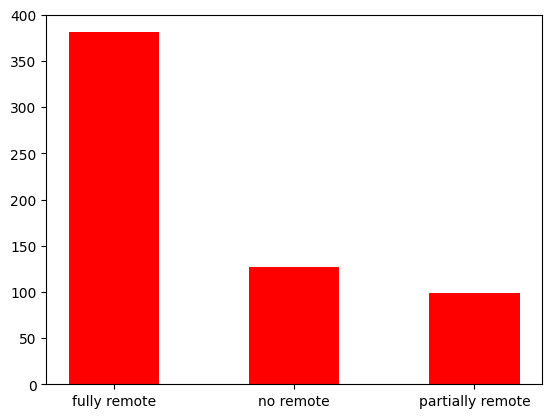

In [23]:
z=plt.bar(labels,values,width=0.5,color='Red')

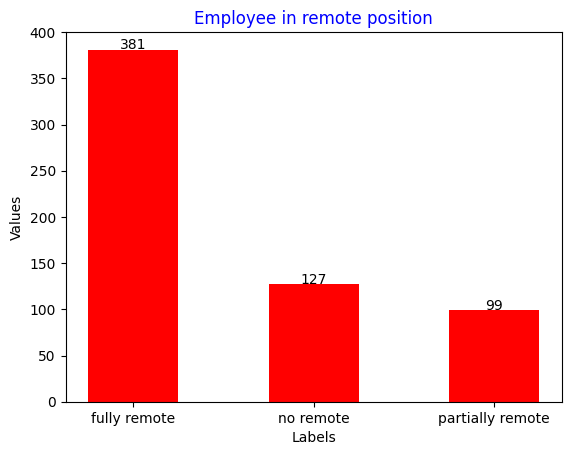

In [24]:
z = plt.bar(labels, values, width=0.5, color='red')

for i, v in enumerate(values):
    plt.text(i, v + 0.5, f"{v}", ha='center', fontsize=10)
plt.xlabel("Labels")
plt.ylabel("Values")
plt.title("Employee in remote position", color='blue')

plt.show()


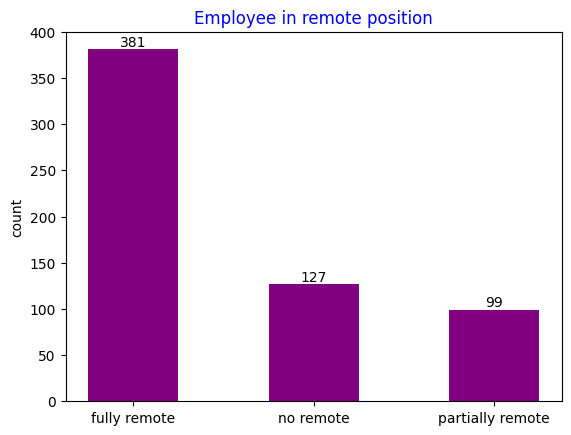

In [25]:
z = plt.bar(labels, values, width=0.5, color='purple')
plt.bar_label(z,labels=values)
plt.title("Employee in remote position", color='blue')
plt.ylabel('count')
plt.show()

In [26]:
df.company_size.unique()

array(['L', 'S', 'M'], dtype=object)

In [27]:
## company size analusis

In [28]:
df3=df.company_size.value_counts()
df3

company_size
M    326
L    198
S     83
Name: count, dtype: int64

In [29]:
df3.index.to_list()

['M', 'L', 'S']

In [30]:
df3.index

Index(['M', 'L', 'S'], dtype='object', name='company_size')

In [31]:
values2=df3.to_list()
values2

[326, 198, 83]

In [32]:
company_labels=["Medium","Large","Small"]
company_labels

['Medium', 'Large', 'Small']

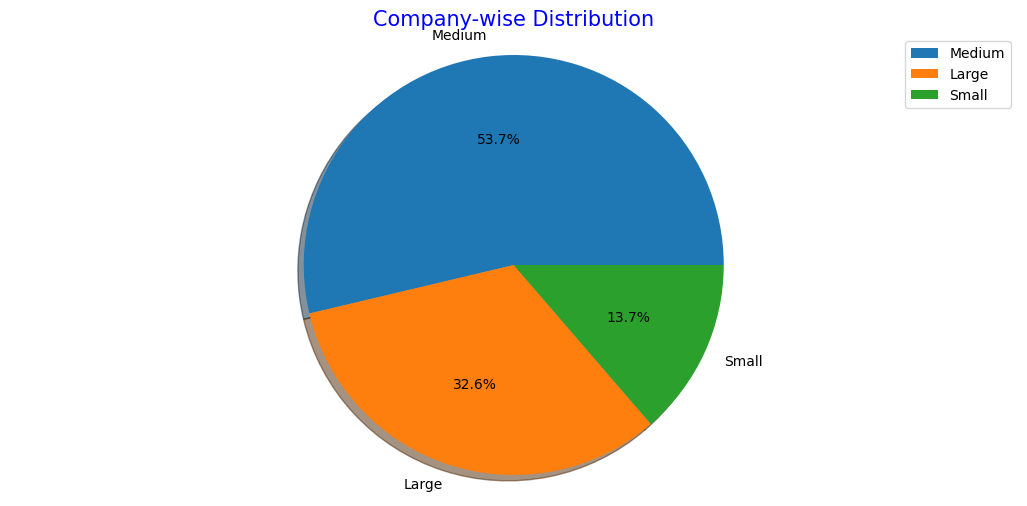

In [33]:
plt.figure(figsize=(13,6))

plt.pie(
    x=values2,
    labels=company_labels,   
    autopct='%1.1f%%',
    shadow=True
)

plt.title("Company-wise Distribution", fontsize=15, color='blue')
plt.legend(labels=company_labels, loc="upper right")
plt.axis('equal')  
plt.show()


In [34]:
## Jobs Analysis

In [35]:
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [36]:
df.job_title.unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

In [37]:
df.job_title.value_counts()

job_title
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Machine Learning Scientist                    8
Big Data Engineer                             8
Director of Data Science                      7
AI Scientist                                  7
Principal Data Scientist                      7
Data Science Consultant                       7
Data Analytics Manager                        7
BI Data Analyst                               6
Computer Vision Engineer                      6
ML Engineer                                   6
Lead Data Engineer                            6
Applied Data Scientist                        5
Business Data Analyst                         5
Data Engineering Manager      

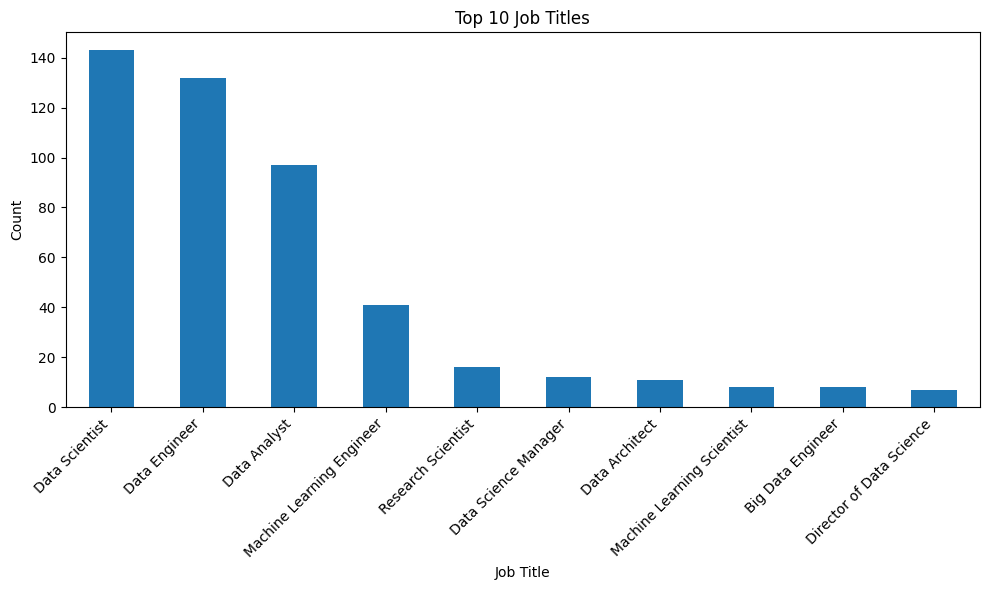

In [38]:
top10 = df['job_title'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top10.plot(kind='bar')
plt.xlabel("Job Title")
plt.ylabel("Count")
plt.title("Top 10 Job Titles")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [39]:
df4 = df['job_title'].value_counts().head(10)
df4

job_title
Data Scientist                143
Data Engineer                 132
Data Analyst                   97
Machine Learning Engineer      41
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Machine Learning Scientist      8
Big Data Engineer               8
Director of Data Science        7
Name: count, dtype: int64

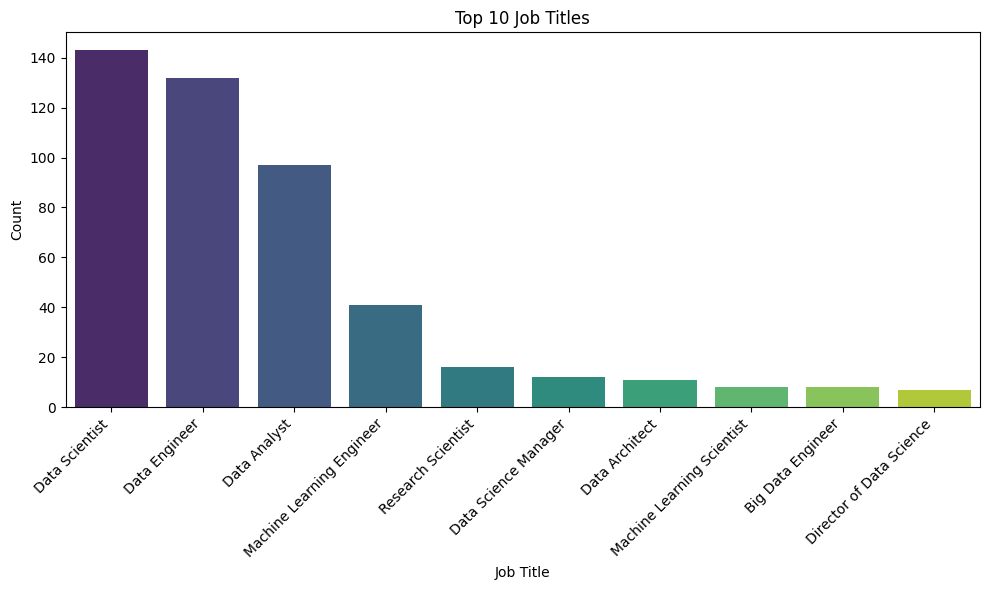

In [40]:
df4 = df['job_title'].value_counts().head(10)
plt.figure(figsize=(10,6))

sns.barplot(x=df4.index, y=df4.values, palette="viridis")

plt.xlabel("Job Title")
plt.ylabel("Count")
plt.title("Top 10 Job Titles")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [41]:
## Salary as per company size

In [42]:
df5=df[["salary_in_usd","company_size"]]
df5

,salary_in_usd,company_size
0,79833,L
1,260000,S
2,109024,M
3,20000,S
4,150000,L
...,...,...
602,154000,M
603,126000,M
604,129000,M
605,150000,M


In [43]:
# Assuming your DataFrame is named df
df_small = df[df['company_size'] == 'S']
df_medium = df[df['company_size'] == 'M']
df_large = df[df['company_size'] == 'L']

In [44]:
print("Small Companies:\n", df_small.head())
print("\nMedium Companies:\n", df_medium.head())
print("\nLarge Companies:\n", df_large.head())

Small Companies:
     Unnamed: 0  work_year experience_level employment_type  \
1            1       2020               SE              FT   
3            3       2020               MI              FT   
6            6       2020               SE              FT   
9            9       2020               SE              FT   
10          10       2020               EN              FT   

                     job_title  salary salary_currency  salary_in_usd  \
1   Machine Learning Scientist  260000             USD         260000   
3         Product Data Analyst   20000             USD          20000   
6          Lead Data Scientist  190000             USD         190000   
9           Lead Data Engineer  125000             USD         125000   
10              Data Scientist   45000             EUR          51321   

   employee_residence  remote_ratio company_location company_size  
1                  JP             0               JP            S  
3                  HN             

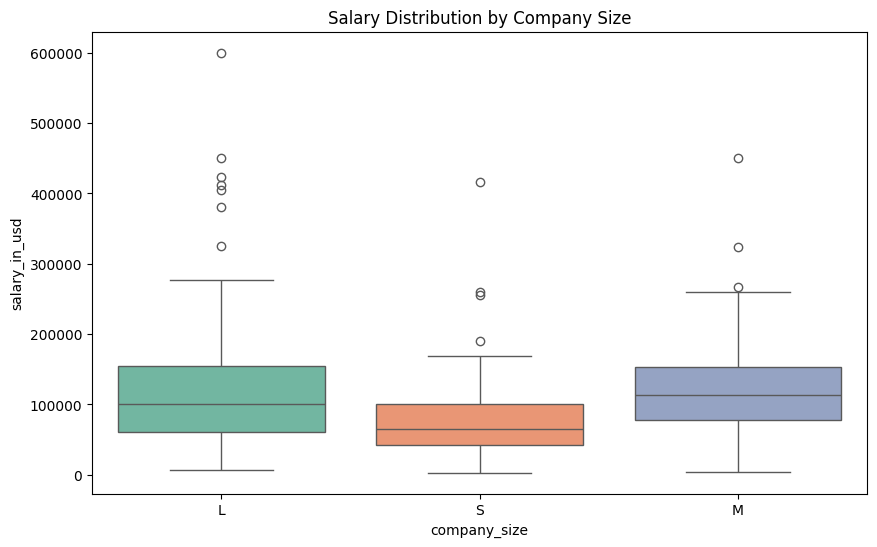

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x='company_size', y='salary_in_usd', data=df, palette='Set2')
plt.title('Salary Distribution by Company Size')
plt.show()

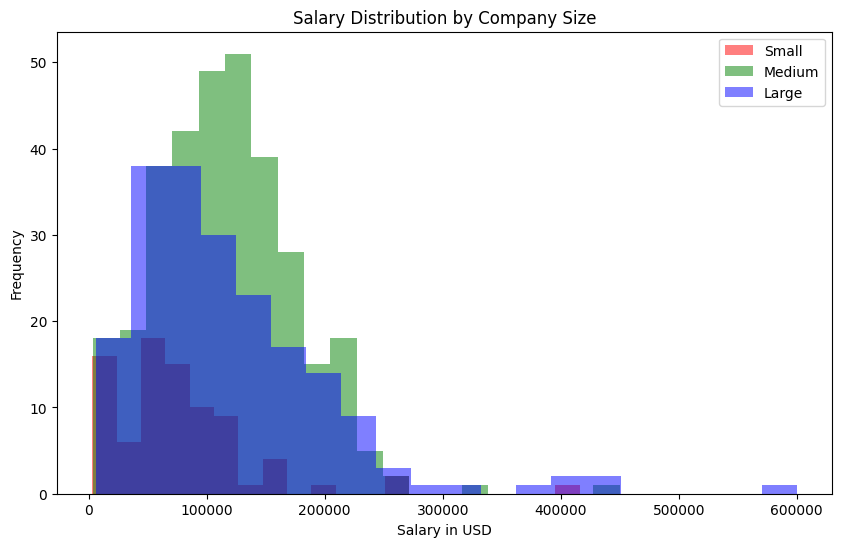

In [46]:
plt.figure(figsize=(10,6))
plt.hist(df_small['salary_in_usd'], bins=20, alpha=0.5, label='Small', color='red')
plt.hist(df_medium['salary_in_usd'], bins=20, alpha=0.5, label='Medium', color='green')
plt.hist(df_large['salary_in_usd'], bins=20, alpha=0.5, label='Large', color='blue')
plt.title('Salary Distribution by Company Size')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [47]:
avg_salary = df.groupby('company_size')['salary_in_usd'].mean().round(2)
avg_salary

company_size
L    119242.99
M    116905.47
S     77632.67
Name: salary_in_usd, dtype: float64

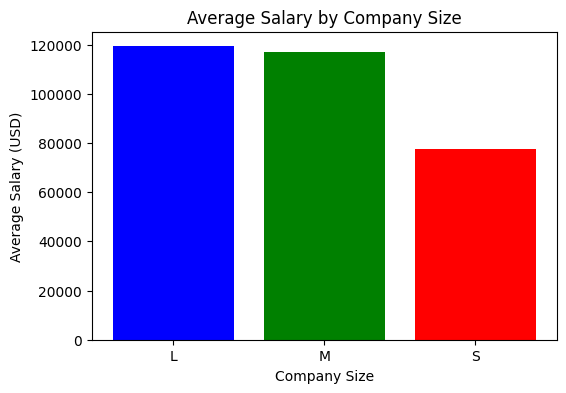

In [48]:
plt.figure(figsize=(6,4))
plt.bar(avg_salary.index, avg_salary.values, color=['blue','green','red'])
plt.title('Average Salary by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Average Salary (USD)')
plt.show()

### The bar chart shows that larger companies generally offer higher average salaries than medium and small companies, clearly highlighting salary differences by company size.

In [51]:
S = df5[df5['company_size'] == 'S']
M = df5[df5['company_size'] == 'M']
L = df5[df5['company_size'] == 'L']

labels = ['Small', 'Medium', 'Large']

sal_mean = [S['salary_in_usd'].mean(), 
            M['salary_in_usd'].mean(), 
            L['salary_in_usd'].mean()]

label_change = np.round(sal_mean, 1)               
label_change = list(map(str, label_change))       
label_change = [x + '$' for x in label_change]     


print("Mean Salaries:", sal_mean)
print("Formatted Labels:", label_change)

Mean Salaries: [np.float64(77632.67469879518), np.float64(116905.46625766871), np.float64(119242.99494949495)]
Formatted Labels: ['77632.7$', '116905.5$', '119243.0$']


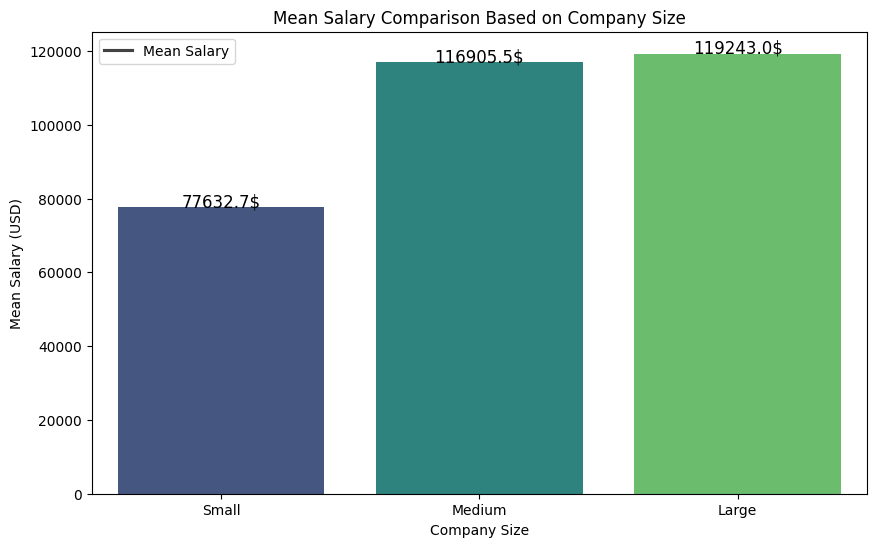

In [52]:
plot_df = pd.DataFrame({
    'Company Size': ['Small', 'Medium', 'Large'],
    'Mean Salary (USD)': sal_mean
})

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=plot_df, x='Company Size', y='Mean Salary (USD)', palette='viridis')

for i, value in enumerate(sal_mean):
    ax.text(i, value + 200, f"{value:.1f}$", ha='center', fontsize=12)

plt.title("Mean Salary Comparison Based on Company Size")
plt.xlabel("Company Size")
plt.ylabel("Mean Salary (USD)")
plt.legend(['Mean Salary'])

plt.show()